### Import libs

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import datetime

from pyramid.arima import auto_arima

### Read data

In [2]:
df = pd.read_csv("data-wrss9.csv", parse_dates=["Date"], index_col=0)

### Rename columns

In [3]:
df.columns

Index(['Total confirmed cases', 'Total deaths', 'Total recovered'], dtype='object')

In [4]:
df.rename(columns={'Total confirmed cases':'TotalConfirmedCases',
                   'Total deaths':'TotalDeaths',
                   'Total recovered':'TotalRecovered'
                  }, inplace=True)

### Data Analysis

In [5]:
df.head()

,TotalConfirmedCases,TotalDeaths,TotalRecovered
Date,,,
Jan 23,555,0,0
Jan 24,653,18,30
Jan 25,941,26,36
Jan 26,2019,56,49
Jan 27,2794,80,54


In [6]:
df.tail()

,TotalConfirmedCases,TotalDeaths,TotalRecovered
Date,,,
Mar 23,351377,15340,100524
Mar 24,391843,17150,103262
Mar 25,438441,19656,111877
Mar 26,488161,22077,117677
Mar 27,533892,24057,122717


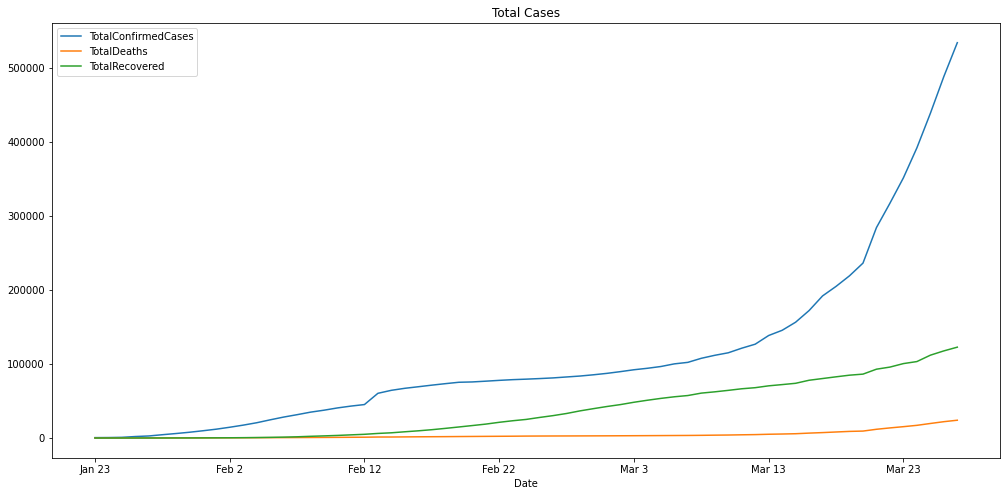

In [7]:
df.TotalConfirmedCases.plot(title="Total Cases", figsize=(17, 8), legend=True)
df.TotalDeaths.plot(figsize=(17, 8), legend=True)
df.TotalRecovered.plot(figsize=(17, 8), legend=True)

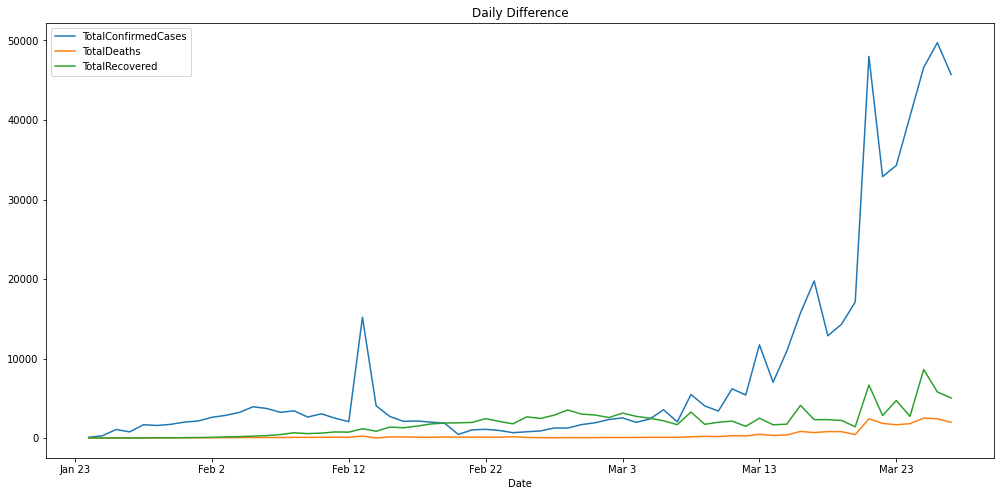

In [8]:
(df.TotalConfirmedCases - df.TotalConfirmedCases.shift(1)).plot(title="Daily Difference", figsize=(17, 8), legend=True)
(df.TotalDeaths - df.TotalDeaths.shift(1)).plot(figsize=(17, 8), legend=True)
(df.TotalRecovered - df.TotalRecovered.shift(1)).plot(figsize=(17, 8), legend=True)

### Constants for predictions

In [9]:
predicted_days = 5
firstPredictionDay = datetime.datetime.strptime(df.index[-1] + ' 2020','%b %d %Y') + datetime.timedelta(days = 1)

### Arima for confirmed cases

In [10]:
confirmed_model = auto_arima(df.TotalConfirmedCases,
                            seasonal=False,
                            trace=True,
                            error_action='ignore',  
                            suppress_warnings=True, 
                            stepwise=True)

Fit ARIMA: order=(2, 2, 2); AIC=1250.144, BIC=1263.002, Fit time=5.040 seconds
Fit ARIMA: order=(0, 2, 0); AIC=1262.939, BIC=1267.225, Fit time=0.039 seconds
Fit ARIMA: order=(1, 2, 0); AIC=1257.563, BIC=1263.993, Fit time=0.849 seconds
Fit ARIMA: order=(0, 2, 1); AIC=1255.063, BIC=1261.493, Fit time=0.424 seconds
Fit ARIMA: order=(1, 2, 2); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 2, 2); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 2, 1); AIC=1258.540, BIC=1269.255, Fit time=1.968 seconds
Fit ARIMA: order=(2, 2, 3); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 2, 1); AIC=1257.062, BIC=1265.634, Fit time=1.987 seconds
Fit ARIMA: order=(3, 2, 3); AIC=nan, BIC=nan, Fit time=nan seconds
Total fit time: 15.130 seconds


In [11]:
confirmed_model.aic()

1250.1435405152101

In [12]:
confirmed_model.fit(df.TotalConfirmedCases)

ARIMA(callback=None, disp=0, maxiter=50, method=None, order=(2, 2, 2),
      out_of_sample_size=0, scoring='mse', scoring_args={}, seasonal_order=None,
      solver='lbfgs', start_params=None, suppress_warnings=True,
      transparams=True, trend='c')

In [13]:
new_cases_forecast = confirmed_model.predict(n_periods=predicted_days)

In [14]:
for x in range (0, predicted_days):
    print(str(firstPredictionDay + datetime.timedelta(days = x))[0:10] + " - " +str(int(new_cases_forecast[x])))

2020-03-28 - 588686
2020-03-29 - 648198
2020-03-30 - 710892
2020-03-31 - 776144
2020-04-01 - 843635


### Arima for death cases

In [15]:
deaths_model = auto_arima(df.TotalDeaths,
                            seasonal=False,
                            trace=True,
                            error_action='ignore',  
                            suppress_warnings=True, 
                            stepwise=True)

Fit ARIMA: order=(2, 2, 2); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 2, 0); AIC=900.038, BIC=904.324, Fit time=0.027 seconds
Fit ARIMA: order=(1, 2, 0); AIC=893.018, BIC=899.447, Fit time=0.561 seconds
Fit ARIMA: order=(0, 2, 1); AIC=888.210, BIC=894.640, Fit time=0.630 seconds
Fit ARIMA: order=(1, 2, 1); AIC=890.106, BIC=898.678, Fit time=1.130 seconds
Fit ARIMA: order=(0, 2, 2); AIC=889.865, BIC=898.438, Fit time=0.850 seconds
Fit ARIMA: order=(1, 2, 2); AIC=nan, BIC=nan, Fit time=nan seconds
Total fit time: 5.431 seconds


In [16]:
deaths_model.aic()

888.2104091420734

In [17]:
deaths_model.fit(df.TotalDeaths)

ARIMA(callback=None, disp=0, maxiter=50, method=None, order=(0, 2, 1),
      out_of_sample_size=0, scoring='mse', scoring_args={}, seasonal_order=None,
      solver='lbfgs', start_params=None, suppress_warnings=True,
      transparams=True, trend='c')

In [18]:
death_forecast = deaths_model.predict(n_periods=predicted_days)

In [19]:
for x in range (0, predicted_days):
    print(str(firstPredictionDay + datetime.timedelta(days = x))[0:10] + " - " +str(int(death_forecast[x])))

2020-03-28 - 26250
2020-03-29 - 28478
2020-03-30 - 30741
2020-03-31 - 33038
2020-04-01 - 35370


### Arima for recovered cases

In [20]:
recovered_model = auto_arima(df.TotalRecovered,
                            seasonal=False,
                            trace=True,
                            error_action='ignore',  
                            suppress_warnings=True, 
                            stepwise=True)

Fit ARIMA: order=(2, 2, 2); AIC=1048.893, BIC=1061.752, Fit time=3.303 seconds
Fit ARIMA: order=(0, 2, 0); AIC=1089.911, BIC=1094.197, Fit time=0.029 seconds
Fit ARIMA: order=(1, 2, 0); AIC=1059.435, BIC=1065.865, Fit time=0.695 seconds
Fit ARIMA: order=(0, 2, 1); AIC=1055.107, BIC=1061.536, Fit time=0.857 seconds
Fit ARIMA: order=(1, 2, 2); AIC=1046.712, BIC=1057.428, Fit time=1.950 seconds
Fit ARIMA: order=(1, 2, 1); AIC=1051.943, BIC=1060.515, Fit time=1.284 seconds
Fit ARIMA: order=(1, 2, 3); AIC=1048.684, BIC=1061.543, Fit time=3.259 seconds
Fit ARIMA: order=(2, 2, 3); AIC=1050.374, BIC=1065.376, Fit time=4.209 seconds
Fit ARIMA: order=(0, 2, 2); AIC=1047.296, BIC=1055.869, Fit time=0.656 seconds
Total fit time: 16.365 seconds


In [21]:
recovered_model.aic()

1046.7119899154882

In [22]:
recovered_model.fit(df.TotalRecovered)

ARIMA(callback=None, disp=0, maxiter=50, method=None, order=(1, 2, 2),
      out_of_sample_size=0, scoring='mse', scoring_args={}, seasonal_order=None,
      solver='lbfgs', start_params=None, suppress_warnings=True,
      transparams=True, trend='c')

In [23]:
recovered_forecast = recovered_model.predict(n_periods=predicted_days)

In [24]:
for x in range (0, predicted_days):
    print(str(firstPredictionDay + datetime.timedelta(days = x))[0:10] + " - " +str(int(recovered_forecast[x])))

2020-03-28 - 129780
2020-03-29 - 137005
2020-03-30 - 144362
2020-03-31 - 151837
2020-04-01 - 159425
